<a href="https://colab.research.google.com/github/talitacgs/Classification-NonVerbalTouristsData/blob/main/FinalProject_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

###Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv")
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


###Tratamento dos dados

Abaixo trate os valores "?" presente em algumas colunas. Use a estratégia que for mais confortável. 

Dica: Use a função `replace`.

In [ ]:
df.replace('?',0)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,F,36,england,no,indiferent,dislikes,dislikes,likes,likes,dislikes,...,7,4,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,4
69,M,38,russia,no,dislikes,dislikes,dislikes,likes,likes,dislikes,...,2,5,C,dislikes,dislikes,dislikes,dislikes,dislikes,dislikes,5
70,F,46,canada,no,dislikes,indiferent,indiferent,indiferent,likes,dislikes,...,1,2,A,dislikes,dislikes,indiferent,indiferent,dislikes,indiferent,5
71,M,39,germany,no,dislikes,dislikes,0,likes,likes,dislikes,...,4,4,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,5


A seguir substitua os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos definidos por você.
 
Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [ ]:
le = LabelEncoder()

for name in df.columns:
  if df[name].dtypes == 'O':
    df[name] = df[name].astype(str)
    le.fit(df[name])
    df[name] = le.transform(df[name])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   sex                       73 non-null     int64
 1   age                       73 non-null     int64
 2   country                   73 non-null     int64
 3   returning                 73 non-null     int64
 4   GImg1                     73 non-null     int64
 5   GImg2                     73 non-null     int64
 6   GImg3                     73 non-null     int64
 7   PImg1                     73 non-null     int64
 8   PImg2                     73 non-null     int64
 9   PImg3                     73 non-null     int64
 10  PImg4                     73 non-null     int64
 11  PImg5                     73 non-null     int64
 12  Tense - relaxed           73 non-null     int64
 13  Authoritative -anarchic   73 non-null     int64
 14  Hostile - friendly        73 non-null     in

Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Justifique a remoção de colunas caso ocoram.

In [ ]:
df.describe()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.479452,47.260274,6.095890,0.520548,1.602740,1.369863,2.369863,0.958904,0.0,1.369863,...,4.164384,2.232877,1.027397,0.191781,0.260274,1.821918,0.164384,0.205479,0.164384,2.493151
std,0.503035,15.115323,3.895027,0.503035,0.639873,0.754741,0.808064,0.199886,0.0,0.858080,...,3.023122,1.467429,0.865586,0.396426,0.500760,0.509424,0.408714,0.470192,0.441390,1.226142
min,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.0,1.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,47.000000,6.000000,1.000000,2.000000,2.000000,3.000000,1.000000,0.0,2.000000,...,4.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,56.000000,8.000000,1.000000,2.000000,2.000000,3.000000,1.000000,0.0,2.000000,...,7.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,81.000000,15.000000,1.000000,2.000000,2.000000,3.000000,1.000000,0.0,2.000000,...,10.000000,6.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000


In [ ]:
#Dropei coluna PImg2 pois de acordo com o describe a média e a variancia são 0
df.drop(columns = ['PImg2'], inplace = True)

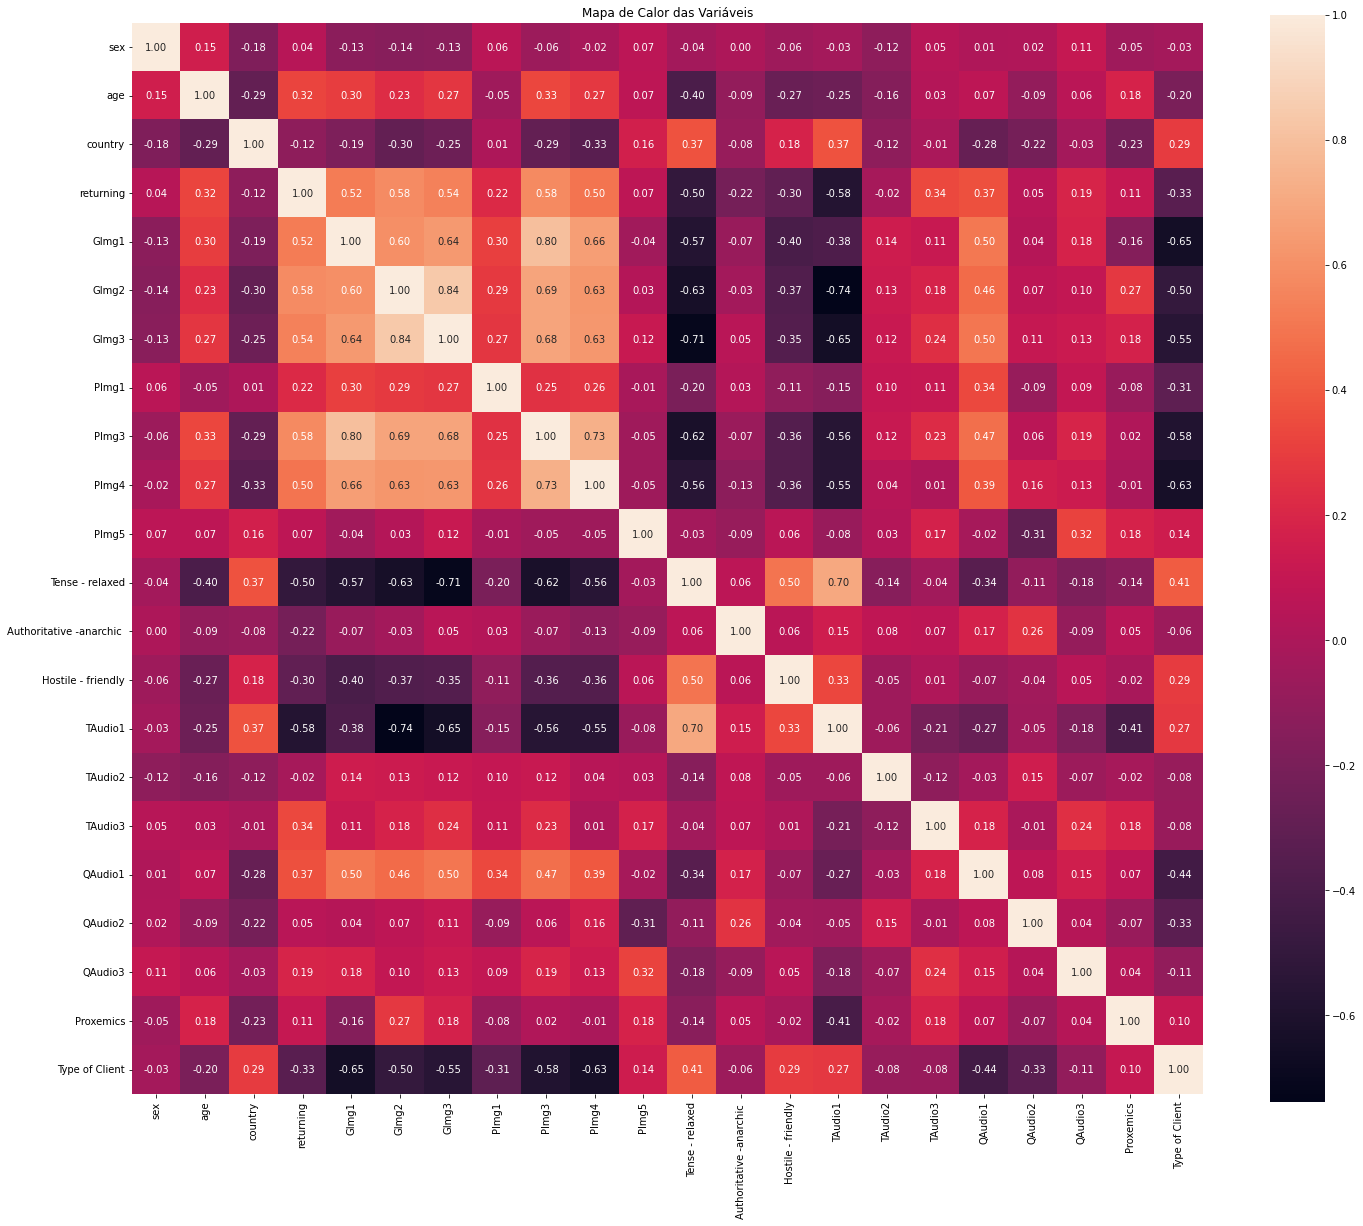

In [ ]:
plt.figure(figsize = (24,20))
sns.heatmap(df.corr(), fmt='.2f', square = True, linecolor = "white", annot= True)
plt.title("Mapa de Calor das Variáveis")
plt.show()

In [ ]:
# Testei dropar colunas com baixa relação (<0.6), mas aumenta o Erro Rate com relação ao K Value

#df.drop(columns = ['GImg1'], inplace = True)
#df.drop(columns = ['PImg4'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   sex                       73 non-null     int64
 1   age                       73 non-null     int64
 2   country                   73 non-null     int64
 3   returning                 73 non-null     int64
 4   GImg1                     73 non-null     int64
 5   GImg2                     73 non-null     int64
 6   GImg3                     73 non-null     int64
 7   PImg1                     73 non-null     int64
 8   PImg3                     73 non-null     int64
 9   PImg4                     73 non-null     int64
 10  PImg5                     73 non-null     int64
 11  Tense - relaxed           73 non-null     int64
 12  Authoritative -anarchic   73 non-null     int64
 13  Hostile - friendly        73 non-null     int64
 14  TAudio1                   73 non-null     in

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


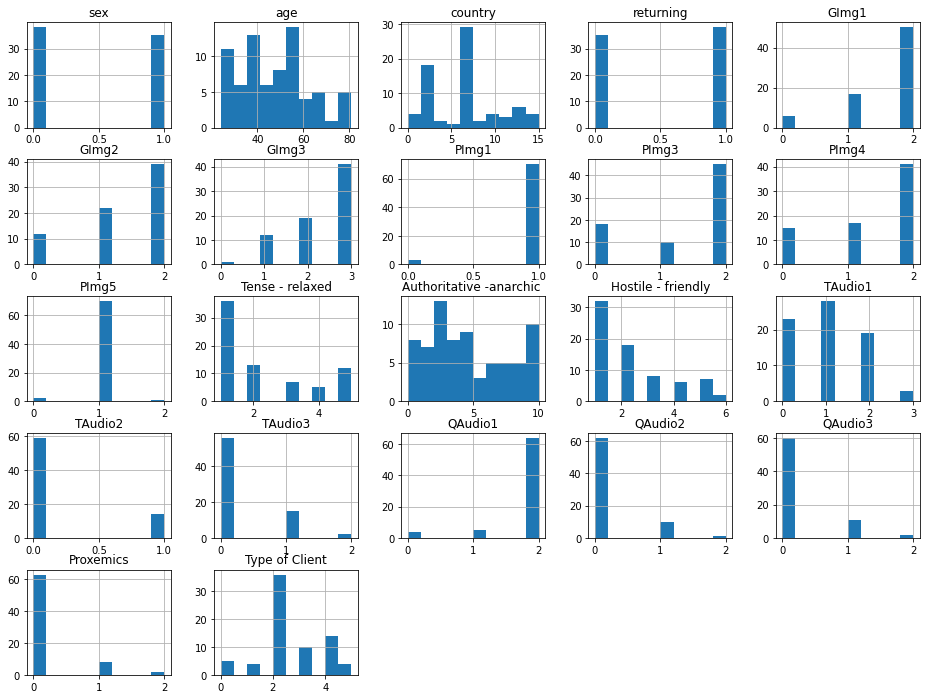

In [ ]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

Faça as demais transformações que julgar necessárias na base de dados.

In [ ]:
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,0,42,15,0,2,1,2,1,1,1,...,8,3,2,0,0,1,0,0,0,0
1,1,60,1,0,2,1,2,1,2,2,...,9,1,1,0,0,2,2,0,0,0
2,0,25,6,0,1,1,2,1,1,2,...,1,5,2,0,0,2,0,0,0,0
3,1,43,2,0,2,0,1,1,1,1,...,2,1,2,0,0,2,0,1,0,0
4,1,30,8,0,1,1,2,1,1,2,...,9,3,2,0,0,2,1,0,0,0


###Separação treino/teste

Separe os valores e os rótulos da base de dados.

In [ ]:
X = df.drop('Type of Client', axis = 1)
y = df['Type of Client']

Separe a base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 101)

## Padronização das Variáveis

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##KNN

Instancie e treine a KNN com diversos valores para os vizinhos. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
#Criando uma função para treinar o modelo k-NN e que recebe o valor de k de fora iterativa
#Calcula f1_score, pois é uma métrica que combina precisão e recall
#Foi definido average pois é um parametro obrigatorio para targets multilabels
#average = weighted, ao analisar o histograma os dados são desbalanceados

def train_knn(X_train, X_test, y_train,i):
  from sklearn.metrics import f1_score
  neigh = KNeighborsClassifier(n_neighbors=i)
  model = neigh.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_test,y_pred,average='weighted')

  return f1

In [ ]:
error_rate = []

for i in range(1,40):
    pred_i = train_knn(X_train, X_test, y_train,i+1)
    erro = 1-pred_i #analisa erros, pois f1 retorna acertos
    error_rate.append(erro)
   

print(error_rate)

[0.2600000000000001, 0.25384615384615383, 0.3603238866396762, 0.3327935222672065, 0.31174089068825916, 0.31174089068825916, 0.31174089068825916, 0.33333333333333326, 0.33333333333333326, 0.33333333333333326, 0.3543859649122807, 0.3543859649122807, 0.33333333333333326, 0.33333333333333326, 0.33333333333333326, 0.3543859649122807, 0.33333333333333326, 0.33333333333333326, 0.33333333333333326, 0.33333333333333326, 0.33333333333333326, 0.3533834586466166, 0.3543859649122807, 0.374436090225564, 0.374436090225564, 0.374436090225564, 0.374436090225564, 0.374436090225564, 0.37205081669691464, 0.37205081669691464, 0.37205081669691464, 0.37205081669691464, 0.37205081669691464, 0.4245614035087718, 0.4245614035087718, 0.4245614035087718, 0.4245614035087718, 0.4245614035087718, 0.5110356536502547]


In [ ]:
#Calculo da acurácia
neigh = KNeighborsClassifier(n_neighbors=5)
model_acc = neigh.fit(X_train, y_train)
y_pred = model_acc.predict(X_test)


score = model_acc.score(X_test, y_test)
print('Acurácia aproximada: ', score)

Acurácia aproximada:  0.7368421052631579


In [ ]:
#Para k=3 o valor da acurácia é 0.789, porém o gráfico Error rate vs k value
# mostra que k=3 é uma região instável

Plote as métricas em um gráfico.

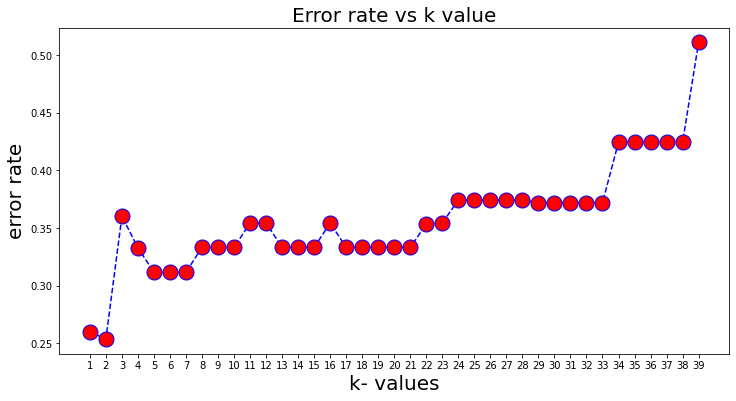

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,marker="o",markerfacecolor="red",
         linestyle="dashed",color="blue",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,40))
plt.show()

Plote a matriz de confusão.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print('Para K = 5')
neigh = KNeighborsClassifier(n_neighbors= 5)
model5 = neigh.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

print(classification_report(y_test, y_pred5))

Para K = 5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.86      1.00      0.92        12
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2

    accuracy                           0.74        19
   macro avg       0.30      0.40      0.34        19
weighted avg       0.61      0.74      0.67        19



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


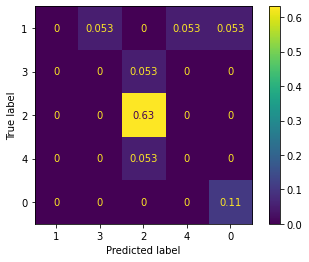

In [ ]:
cm = confusion_matrix(y_test, y_pred5,normalize='all')

cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.show()

In [ ]:
print('Para K = 3')
neigh = KNeighborsClassifier(n_neighbors= 3)
model3 = neigh.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))

Para K = 3
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.00      0.00      0.00         1
           2       0.86      1.00      0.92        12
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2

    accuracy                           0.79        19
   macro avg       0.50      0.47      0.44        19
weighted avg       0.77      0.79      0.75        19



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


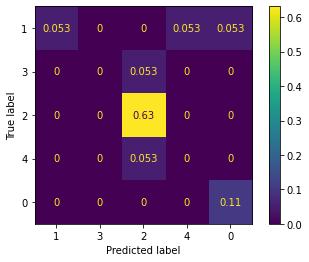

In [ ]:
cm = confusion_matrix(y_test, y_pred3,normalize='all')

cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.show()